# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
!git clone https://github.com/ultralytics/yolov5.git
%cd {HOME}/yolov5
%pip install -r requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-107-g7a972e8 Python-3.7.12 torch-1.12.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4331.1/8062.4 GB disk)


In [3]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/14.9M [00:00<?, ?B/s]

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

  0%|          | 0.00/91.9M [00:00<?, ?B/s]

  0%|          | 0.00/170M [00:00<?, ?B/s]

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

Copy and paste that snippet into the cell below.

In [4]:
%cd {HOME}/yolov5 
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fMypfsDsmDRn1Ekv1k82")
project = rf.workspace("hackathon-tdwhr").project("pothole-segmentation-hqol4")
dataset = project.version(7).download("yolov5")

/kaggle/working/yolov5
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=72f3d7d3d5ddbcd112ea4413777adb0267e77792aab2c2221999daec6cfde4c7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9

Extracting Dataset Version Zip to Pothole-Segmentation-7 in yolov5pytorch:: 100%|██████████| 3262/3262 [00:01<00:00, 2766.48it/s]


In [5]:
%cat {dataset.location}/data.yaml

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
names:
- Potholes
nc: 1
roboflow:
  license: CC BY 4.0
  project: pothole-segmentation-hqol4
  url: https://universe.roboflow.com/hackathon-tdwhr/pothole-segmentation-hqol4/dataset/7
  version: 7
  workspace: hackathon-tdwhr
test: ../test/images
train: Pothole-Segmentation-7/train/images
val: Pothole-Segmentation-7/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training. 

In [8]:
%cd {HOME}/yolov5 
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

/kaggle/working/yolov5
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
segment/train: weights=yolov5s-seg.pt, cfg=, data=/kaggle/working/yolov5/Pothole-Segmentation-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, 

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/yolov5/runs/train-seg/custom-dataset/results.png'

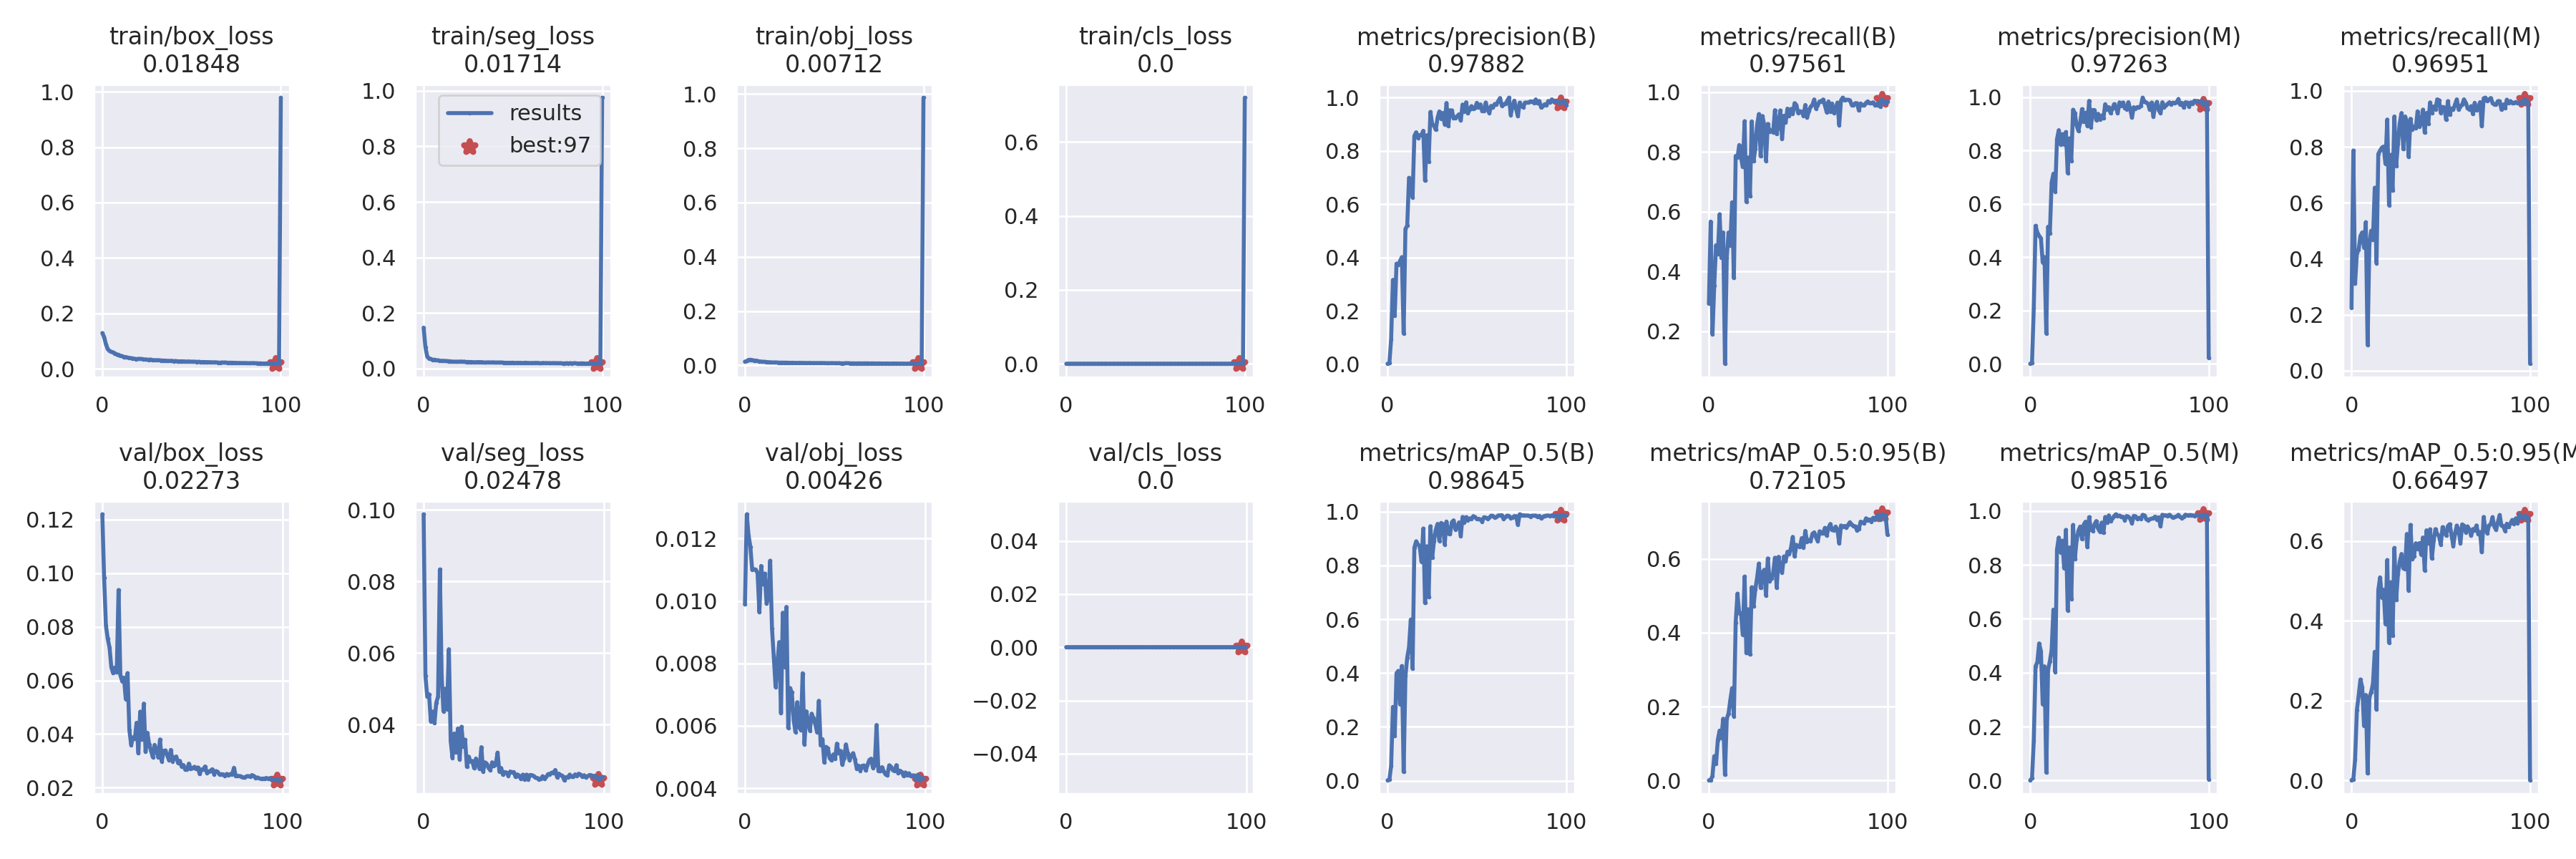

In [13]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset2/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [14]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/kaggle/working/yolov5
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
segment/val: data=/kaggle/working/yolov5/Pothole-Segmentation-7/data.yaml, weights=['/kaggle/working/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-107-g7a972e8 Python-3.7.12 torch-1.12.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /kaggle/working/yolov5/Pothole-Segmentation-7/valid/labels.cache..
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        100        164      0.979      0.976      0.

### Infer With Your Custom Model

In [ ]:
# import os

# if os.path.exists(os.path.join(dataset.location, "test")):
#     split_path = os.path.join(dataset.location, "test", "images")
# else:
#     split_path = os.path.join(dataset.location, "valid", "images")
# example_image_name = os.listdir(split_path)[0]
# example_image_path = os.path.join(split_path, example_image_name)

# %cd {HOME}/yolov5
# !python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom-dataset
# display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset2/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.